**任务一：数据预处理与分析**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')
#导入画图程序包

In [3]:
df=pd.read_csv('data.csv')#导入附件一数据

In [4]:
df.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现
3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017/1/1 9:05,C,已出货未退款,已提现
4,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017/1/1 9:41,B,已出货未退款,已提现


In [5]:
df.info()#查看数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70679 entries, 0 to 70678
Data columns (total 9 columns):
订单号     70679 non-null object
设备ID    70679 non-null object
应付金额    70679 non-null float64
实际金额    70679 non-null float64
商品      70679 non-null object
支付时间    70679 non-null object
地点      70679 non-null object
状态      70679 non-null object
提现      70679 non-null object
dtypes: float64(2), object(7)
memory usage: 4.9+ MB


In [6]:
df['支付时间']=pd.to_datetime(df.支付时间,format="%Y-%m-%d %H:%M:%S")#将时间转化为时间格式
df['month']=df.支付时间.values.astype('datetime64[M]')#提取支付时间的月份

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70679 entries, 0 to 70678
Data columns (total 10 columns):
订单号      70679 non-null object
设备ID     70679 non-null object
应付金额     70679 non-null float64
实际金额     70679 non-null float64
商品       70679 non-null object
支付时间     70679 non-null datetime64[ns]
地点       70679 non-null object
状态       70679 non-null object
提现       70679 non-null object
month    70679 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 5.4+ MB


In [8]:
df.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,month
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017-01-01 00:53:00,D,已出货未退款,已提现,2017-01-01
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017-01-01 01:33:00,A,已出货未退款,已提现,2017-01-01
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017-01-01 08:45:00,E,已出货未退款,已提现,2017-01-01
3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017-01-01 09:05:00,C,已出货未退款,已提现,2017-01-01
4,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017-01-01 09:41:00,B,已出货未退款,已提现,2017-01-01


In [9]:
df.describe()#对各数据进行描述性分析

,应付金额,实际金额
count,70679.000000,70679.000000
mean,4.060325,4.060325
std,3.357931,3.357931
min,0.000000,0.000000
25%,3.000000,3.000000
50%,3.500000,3.500000
75%,4.500000,4.500000
max,125.000000,125.000000


In [10]:
df.isnull().sum() ##检查是否有缺失值

订单号      0
设备ID     0
应付金额     0
实际金额     0
商品       0
支付时间     0
地点       0
状态       0
提现       0
month    0
dtype: int64

In [11]:
df.duplicated().sum() ##查看是否有重复值

0

- 不存在缺失值和重复值

In [12]:
df[df.应付金额==df.实际金额]

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,month
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017-01-01 00:53:00,D,已出货未退款,已提现,2017-01-01
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017-01-01 01:33:00,A,已出货未退款,已提现,2017-01-01
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017-01-01 08:45:00,E,已出货未退款,已提现,2017-01-01
3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017-01-01 09:05:00,C,已出货未退款,已提现,2017-01-01
4,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017-01-01 09:41:00,B,已出货未退款,已提现,2017-01-01
5,DD2017081016294251D0FA5D314F1,E43A6E078A04134,4.5,4.5,营养快线,2017-01-01 09:41:00,B,已出货未退款,已提现,2017-01-01
6,DD201708167493663534589050871,E43A6E078A04228,7.0,7.0,330ml伊利畅意乳酸菌原味,2017-01-01 10:02:00,C,已出货未退款,已提现,2017-01-01
7,DD201708167493663526093267894,E43A6E078A04228,8.0,8.0,160g盼盼手撕面包,2017-01-01 11:33:00,C,已出货未退款,已提现,2017-01-01
8,DD20170526144916178D2B0429C26,E43A6E078A04134,3.0,3.0,茉莉蜜茶,2017-01-01 11:56:00,B,已出货未退款,已提现,2017-01-01
9,DD20170810162914447BA58EF3127,E43A6E078A04228,2.0,2.0,鸭翅,2017-01-01 11:56:00,C,已出货未退款,已提现,2017-01-01


- 数据数目相同，则数据中应付金额与实际金额数完全相同

In [13]:
df.to_csv(r'C:\Users\1\Desktop\task1_1.csv',encoding='utf_8_sig')#将清洗后的数据导入csv进行分组

In [14]:
data_A=pd.read_csv('task1_1A.csv')
data_B=pd.read_csv('task1_1B.csv')
data_C=pd.read_csv('task1_1C.csv')
data_D=pd.read_csv('task1_1D.csv')
data_E=pd.read_csv('task1_1E.csv')
#讲分组后的各地售货机数据分别导入

In [15]:
data_A.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,month
0,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现,2017/1/1 0:00
1,DD201708167493663388737478695,E43A6E078A04172,5.8,5.8,100g卫龙点心面黑椒牛排味,2017/1/1 19:29,A,已出货未退款,已提现,2017/1/1 0:00
2,DD201708167493663381827746988,E43A6E078A04172,0.8,0.8,咪咪虾条马来西亚风味,2017/1/1 19:33,A,已出货未退款,已提现,2017/1/1 0:00
3,DD201708167493683503095993712,E43A6E078A04172,3.0,3.0,250ml维他柠檬茶,2017/1/1 19:55,A,已出货未退款,已提现,2017/1/1 0:00
4,DD2017081110292488D71D623E8F9,E43A6E078A04172,3.5,3.5,东鹏特饮,2017/1/1 20:18,A,已出货未退款,已提现,2017/1/1 0:00


In [16]:
data_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 10 columns):
订单号      10486 non-null object
设备ID     10486 non-null object
应付金额     10486 non-null float64
实际金额     10486 non-null float64
商品       10486 non-null object
支付时间     10486 non-null object
地点       10486 non-null object
状态       10486 non-null object
提现       10486 non-null object
month    10486 non-null object
dtypes: float64(2), object(8)
memory usage: 819.3+ KB


- 由于时间格式发生变化重新把各地时间转化为时间格式

In [17]:
data_A['支付时间']=pd.to_datetime(data_A.支付时间,format="%Y-%m-%d %H:%M:%S")#将时间转化为时间格式
data_A['month']=data_A.支付时间.values.astype('datetime64[M]')#提取支付时间的月份
data_A['day']=data_A.支付时间.values.astype('datetime64[D]')#提取支付时间的日
data_B['支付时间']=pd.to_datetime(data_B.支付时间,format="%Y-%m-%d %H:%M:%S")
data_B['month']=data_B.支付时间.values.astype('datetime64[M]')
data_B['day']=data_B.支付时间.values.astype('datetime64[D]')
data_C['支付时间']=pd.to_datetime(data_C.支付时间,format="%Y-%m-%d %H:%M:%S")
data_C['month']=data_C.支付时间.values.astype('datetime64[M]')
data_C['day']=data_C.支付时间.values.astype('datetime64[D]')
data_D['支付时间']=pd.to_datetime(data_D.支付时间,format="%Y-%m-%d %H:%M:%S")
data_D['month']=data_D.支付时间.values.astype('datetime64[M]')
data_D['day']=data_D.支付时间.values.astype('datetime64[D]')
data_E['支付时间']=pd.to_datetime(data_E.支付时间,format="%Y-%m-%d %H:%M:%S")
data_E['month']=data_E.支付时间.values.astype('datetime64[M]')
data_E['day']=data_E.支付时间.values.astype('datetime64[D]')

In [18]:
data_B.info()#再次检查数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13482 entries, 0 to 13481
Data columns (total 11 columns):
订单号      13482 non-null object
设备ID     13482 non-null object
应付金额     13482 non-null float64
实际金额     13482 non-null float64
商品       13482 non-null object
支付时间     13482 non-null datetime64[ns]
地点       13482 non-null object
状态       13482 non-null object
提现       13482 non-null object
month    13482 non-null datetime64[ns]
day      13482 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(2), object(6)
memory usage: 1.1+ MB


In [19]:
data_A.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,month,day
0,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017-01-01 01:33:00,A,已出货未退款,已提现,2017-01-01,2017-01-01
1,DD201708167493663388737478695,E43A6E078A04172,5.8,5.8,100g卫龙点心面黑椒牛排味,2017-01-01 19:29:00,A,已出货未退款,已提现,2017-01-01,2017-01-01
2,DD201708167493663381827746988,E43A6E078A04172,0.8,0.8,咪咪虾条马来西亚风味,2017-01-01 19:33:00,A,已出货未退款,已提现,2017-01-01,2017-01-01
3,DD201708167493683503095993712,E43A6E078A04172,3.0,3.0,250ml维他柠檬茶,2017-01-01 19:55:00,A,已出货未退款,已提现,2017-01-01,2017-01-01
4,DD2017081110292488D71D623E8F9,E43A6E078A04172,3.5,3.5,东鹏特饮,2017-01-01 20:18:00,A,已出货未退款,已提现,2017-01-01,2017-01-01


In [20]:
data_A.pivot_table(index='month',aggfunc={'实际金额':'sum','订单号':'count'}).rename(columns={'实际金额':'交易额','订单号':'订单量'})#创建数据透视表，计算A售货机每月的交易额和订单量

,交易额,订单量
month,,
2017-01-01,1509.7,335
2017-02-01,440.5,114
2017-03-01,914.3,255
2017-04-01,1804.5,447
2017-05-01,3385.1,756
2017-06-01,6755.1,1669
2017-07-01,1950.5,476
2017-08-01,2236.9,666
2017-09-01,4479.5,1040


In [21]:
data_B.pivot_table(index='month',aggfunc={'实际金额':'sum','订单号':'count'}).rename(columns={'实际金额':'交易额','订单号':'订单量'})#创建数据透视表，计算B售货机每月的交易额和订单量

,交易额,订单量
month,,
2017-01-01,1373.6,366
2017-02-01,602.3,185
2017-03-01,957.9,265
2017-04-01,2457.4,603
2017-05-01,3681.2,869
2017-06-01,7550.3,1856
2017-07-01,1518.6,345
2017-08-01,3516.1,981
2017-09-01,7207.3,1745


In [22]:
data_C.pivot_table(index='month',aggfunc={'实际金额':'sum','订单号':'count'}).rename(columns={'实际金额':'交易额','订单号':'订单量'})#创建数据透视表，计算C售货机每月的交易额和订单量

,交易额,订单量
month,,
2017-01-01,1640.5,379
2017-02-01,792.0,207
2017-03-01,991.5,263
2017-04-01,3232.3,734
2017-05-01,3729.4,789
2017-06-01,8472.2,1882
2017-07-01,3047.1,764
2017-08-01,4927.2,1259
2017-09-01,7429.0,1678


In [23]:
data_D.pivot_table(index='month',aggfunc={'实际金额':'sum','订单号':'count'}).rename(columns={'实际金额':'交易额','订单号':'订单量'})#创建数据透视表，计算D售货机每月的交易额和订单量

,交易额,订单量
month,,
2017-01-01,956.4,259
2017-02-01,435.5,141
2017-03-01,826.7,192
2017-04-01,1679.1,443
2017-05-01,2392.1,564
2017-06-01,4187.0,1040
2017-07-01,1340.8,317
2017-08-01,2371.3,715
2017-09-01,3833.1,983


In [24]:
data_E.pivot_table(index='month',aggfunc={'实际金额':'sum','订单号':'count'}).rename(columns={'实际金额':'交易额','订单号':'订单量'})#创建数据透视表，计算E售货机每月的交易额和订单量

,交易额,订单量
month,,
2017-01-01,1656.8,354
2017-02-01,938.7,258
2017-03-01,1507.0,350
2017-04-01,3723.1,895
2017-05-01,5699.0,1292
2017-06-01,9899.7,2593
2017-07-01,3186.4,813
2017-08-01,6722.5,1767
2017-09-01,17054.3,4134


In [25]:
df.pivot_table(index='month',aggfunc={'实际金额':'sum','订单号':'count'}).rename(columns={'实际金额':'交易额','订单号':'订单量'})#创建数据透视表，计算所有售货机每月的交易额和订单量

,交易额,订单量
month,,
2017-01-01,7137.0,1693
2017-02-01,3209.0,905
2017-03-01,5197.4,1325
2017-04-01,12896.4,3122
2017-05-01,18886.8,4270
2017-06-01,36864.3,9040
2017-07-01,11043.4,2715
2017-08-01,19774.0,5388
2017-09-01,40003.2,9580


In [26]:
df.订单号.count()

70679

In [27]:
df.实际金额.sum()

286979.7

- 所有售货机的交易总额为286979.7元，订单总量为70679。

In [28]:
data_A.pivot_table(index='month',aggfunc={'实际金额':'mean'}).rename(columns={'实际金额':'每单平均交易额'})

,每单平均交易额
month,
2017-01-01,4.506567
2017-02-01,3.864035
2017-03-01,3.585490
2017-04-01,4.036913
2017-05-01,4.477646
2017-06-01,4.047394
2017-07-01,4.097689
2017-08-01,3.358709
2017-09-01,4.307212


In [29]:
data_A_pivot_table=data_A.pivot_table(index=['month','day'],aggfunc={'订单号':'count'})

In [30]:
data_A_pivot_table.pivot_table(index='month',aggfunc={'订单号':'mean'}).rename(columns={'订单号':'日均订单量'})

,日均订单量
month,
2017-01-01,13.400000
2017-02-01,4.560000
2017-03-01,51.000000
2017-04-01,14.900000
2017-05-01,25.200000
2017-06-01,55.633333
2017-07-01,17.629630
2017-08-01,21.483871
2017-09-01,34.666667


In [31]:
data_B.pivot_table(index='month',aggfunc={'实际金额':'mean'}).rename(columns={'实际金额':'每单平均交易额'})

,每单平均交易额
month,
2017-01-01,3.753005
2017-02-01,3.255676
2017-03-01,3.614717
2017-04-01,4.075290
2017-05-01,4.236133
2017-06-01,4.068050
2017-07-01,4.401739
2017-08-01,3.584200
2017-09-01,4.130258


In [32]:
data_C.pivot_table(index='month',aggfunc={'实际金额':'mean'}).rename(columns={'实际金额':'每单平均交易额'})

,每单平均交易额
month,
2017-01-01,4.328496
2017-02-01,3.826087
2017-03-01,3.769962
2017-04-01,4.403678
2017-05-01,4.726743
2017-06-01,4.501700
2017-07-01,3.988351
2017-08-01,3.913582
2017-09-01,4.427294


In [33]:
data_D.pivot_table(index='month',aggfunc={'实际金额':'mean'}).rename(columns={'实际金额':'每单平均交易额'})

,每单平均交易额
month,
2017-01-01,3.692664
2017-02-01,3.088652
2017-03-01,4.305729
2017-04-01,3.790293
2017-05-01,4.241312
2017-06-01,4.025962
2017-07-01,4.229653
2017-08-01,3.316503
2017-09-01,3.899390


In [34]:
data_E.pivot_table(index='month',aggfunc={'实际金额':'mean'}).rename(columns={'实际金额':'每单平均交易额'})

,每单平均交易额
month,
2017-01-01,4.680226
2017-02-01,3.638372
2017-03-01,4.305714
2017-04-01,4.159888
2017-05-01,4.410991
2017-06-01,3.817856
2017-07-01,3.919311
2017-08-01,3.804471
2017-09-01,4.125375


In [35]:
data_B_pivot_table=data_B.pivot_table(index=['month','day'],aggfunc={'订单号':'count'})
data_B_pivot_table.pivot_table(index='month',aggfunc={'订单号':'mean'}).rename(columns={'订单号':'日均订单量'})

,日均订单量
month,
2017-01-01,15.913043
2017-02-01,7.708333
2017-03-01,44.166667
2017-04-01,20.100000
2017-05-01,28.966667
2017-06-01,61.866667
2017-07-01,11.896552
2017-08-01,31.645161
2017-09-01,58.166667


In [36]:
data_C_pivot_table=data_C.pivot_table(index=['month','day'],aggfunc={'订单号':'count'})
data_C_pivot_table.pivot_table(index='month',aggfunc={'订单号':'mean'}).rename(columns={'订单号':'日均订单量'})

,日均订单量
month,
2017-01-01,14.576923
2017-02-01,7.961538
2017-03-01,52.600000
2017-04-01,24.466667
2017-05-01,26.300000
2017-06-01,62.733333
2017-07-01,26.344828
2017-08-01,40.612903
2017-09-01,55.933333


In [37]:
data_D_pivot_table=data_D.pivot_table(index=['month','day'],aggfunc={'订单号':'count'})
data_D_pivot_table.pivot_table(index='month',aggfunc={'订单号':'mean'}).rename(columns={'订单号':'日均订单量'})

,日均订单量
month,
2017-01-01,11.260870
2017-02-01,5.875000
2017-03-01,48.000000
2017-04-01,14.766667
2017-05-01,18.800000
2017-06-01,34.666667
2017-07-01,11.740741
2017-08-01,23.064516
2017-09-01,32.766667


In [38]:
data_E_pivot_table=data_E.pivot_table(index=['month','day'],aggfunc={'订单号':'count'})
data_E_pivot_table.pivot_table(index='month',aggfunc={'订单号':'mean'}).rename(columns={'订单号':'日均订单量'})

,日均订单量
month,
2017-01-01,13.111111
2017-02-01,9.923077
2017-03-01,50.000000
2017-04-01,29.833333
2017-05-01,43.066667
2017-06-01,86.433333
2017-07-01,27.100000
2017-08-01,57.000000
2017-09-01,137.800000


In [39]:
df_6月=df.loc[df.month=='2017-06-01']#提取月份为6的数据

In [40]:
df_商品销量=df_6月.pivot_table(index='商品',aggfunc={'订单号':'count'}).rename(columns={'订单号':'商品销量'})

Text(0,0.5,'销量')

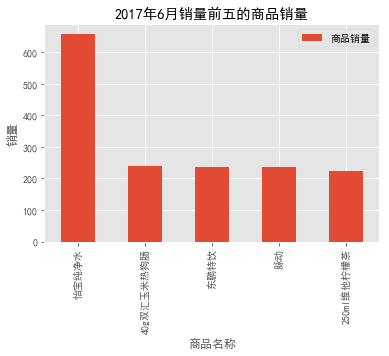

In [41]:
df_商品销量.sort_values('商品销量',ascending=False).head(5).plot.bar()
plt.title('2017年6月销量前五的商品销量')
plt.xlabel('商品名称')
plt.ylabel('销量')

Text(0,0.5,'交易额')

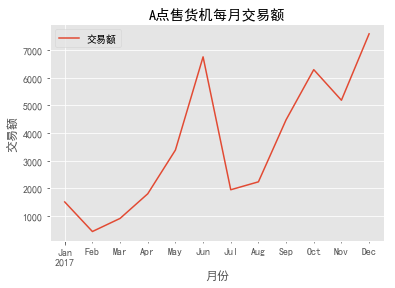

In [42]:
data_A.pivot_table(index='month',aggfunc={'实际金额':'sum'}).rename(columns={'实际金额':'交易额'}).plot()
plt.title('A点售货机每月交易额')
plt.xlabel('月份')
plt.ylabel('交易额')

Text(0,0.5,'交易额')

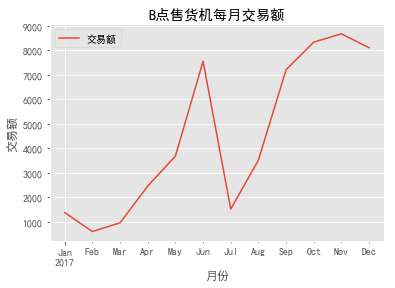

In [43]:
data_B.pivot_table(index='month',aggfunc={'实际金额':'sum'}).rename(columns={'实际金额':'交易额'}).plot()
plt.title('B点售货机每月交易额')
plt.xlabel('月份')
plt.ylabel('交易额')

Text(0,0.5,'交易额')

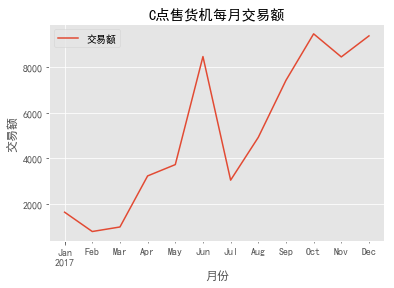

In [44]:
data_C.pivot_table(index='month',aggfunc={'实际金额':'sum'}).rename(columns={'实际金额':'交易额'}).plot()
plt.title('C点售货机每月交易额')
plt.xlabel('月份')
plt.ylabel('交易额')

Text(0,0.5,'交易额')

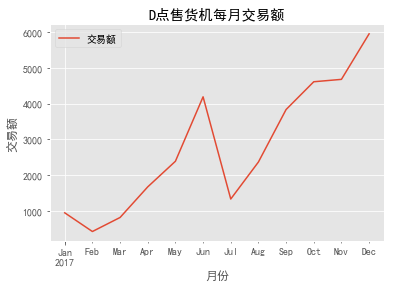

In [45]:
data_D.pivot_table(index='month',aggfunc={'实际金额':'sum'}).rename(columns={'实际金额':'交易额'}).plot()
plt.title('D点售货机每月交易额')
plt.xlabel('月份')
plt.ylabel('交易额')

Text(0,0.5,'交易额')

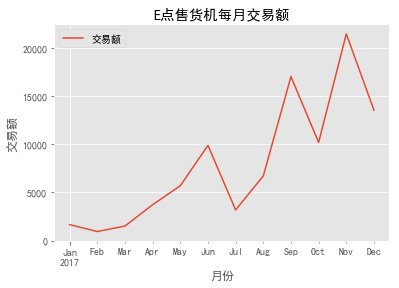

In [46]:
data_E.pivot_table(index='month',aggfunc={'实际金额':'sum'}).rename(columns={'实际金额':'交易额'}).plot()
plt.title('E点售货机每月交易额')
plt.xlabel('月份')
plt.ylabel('交易额')

In [47]:
A交易额=data_A.pivot_table(index='month',aggfunc={'实际金额':'sum'}).rename(columns={'实际金额':'月环比增长率'})

In [48]:
A月比增长率=A交易额.diff()/A交易额.shift()

In [49]:
A月比增长率

,月环比增长率
month,
2017-01-01,NaN
2017-02-01,-0.708220
2017-03-01,1.075596
2017-04-01,0.973641
2017-05-01,0.875921
2017-06-01,0.995539
2017-07-01,-0.711255
2017-08-01,0.146834
2017-09-01,1.002548


Text(0,0.5,'月环比增长率')

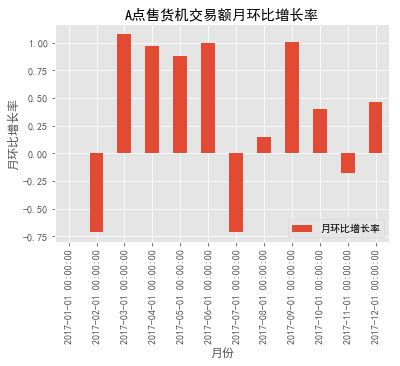

In [50]:
A月比增长率.plot.bar()
plt.title('A点售货机交易额月环比增长率')
plt.xlabel('月份')
plt.ylabel('月环比增长率')

In [51]:
B交易额=data_B.pivot_table(index='month',aggfunc={'实际金额':'sum'}).rename(columns={'实际金额':'交易额'})

In [52]:
B月比增长率=B交易额.diff()/B交易额.shift()

Text(0,0.5,'月环比增长率')

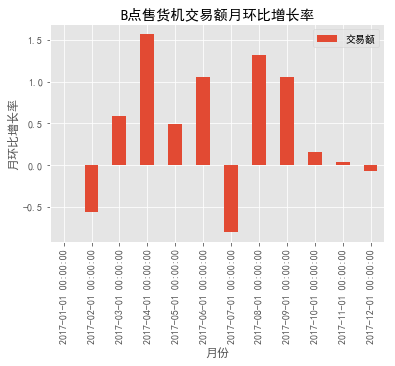

In [53]:
B月比增长率.plot.bar()
plt.title('B点售货机交易额月环比增长率')
plt.xlabel('月份')
plt.ylabel('月环比增长率')

Text(0,0.5,'月环比增长率')

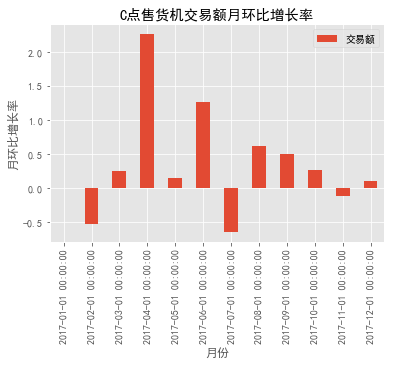

In [54]:
C交易额=data_C.pivot_table(index='month',aggfunc={'实际金额':'sum'}).rename(columns={'实际金额':'交易额'})
C月比增长率=C交易额.diff()/C交易额.shift()
C月比增长率.plot.bar()
plt.title('C点售货机交易额月环比增长率')
plt.xlabel('月份')
plt.ylabel('月环比增长率')

Text(0,0.5,'月环比增长率')

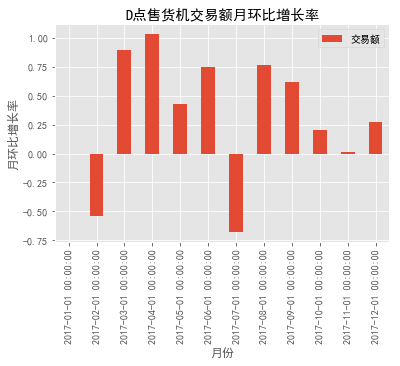

In [55]:
D交易额=data_D.pivot_table(index='month',aggfunc={'实际金额':'sum'}).rename(columns={'实际金额':'交易额'})
D月比增长率=D交易额.diff()/D交易额.shift()
D月比增长率.plot.bar()
plt.title('D点售货机交易额月环比增长率')
plt.xlabel('月份')
plt.ylabel('月环比增长率')

Text(0,0.5,'月环比增长率')

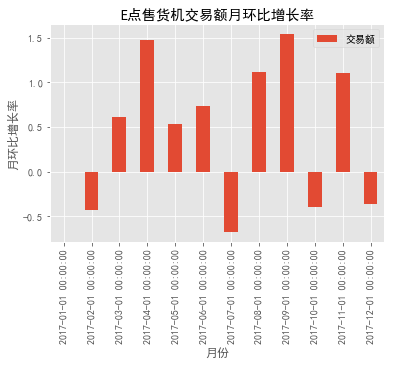

In [56]:
E交易额=data_E.pivot_table(index='month',aggfunc={'实际金额':'sum'}).rename(columns={'实际金额':'交易额'})
E月比增长率=E交易额.diff()/E交易额.shift()
E月比增长率.plot.bar()
plt.title('E点售货机交易额月环比增长率')
plt.xlabel('月份')
plt.ylabel('月环比增长率')

In [57]:
type=pd.read_csv('type.csv')

In [58]:
type.head()

,商品,大类,二级类
0,100g*5瓶益力多,饮料,乳制品
1,100g越南LIPO奶味面包干,非饮料,饼干糕点
2,10g卫龙亲嘴烧香辣味,非饮料,肉干/豆制品/蛋
3,10g越南LIPO奶味面包干,非饮料,饼干糕点
4,110g顺宝九制话梅,非饮料,蜜饯/果干


In [59]:
df_合并数据=df.merge(right=type,how='inner',on='商品')

In [60]:
data_A_合并数据=data_A.merge(right=type,how='inner',on='商品')
data_B_合并数据=data_B.merge(right=type,how='inner',on='商品')
data_C_合并数据=data_C.merge(right=type,how='inner',on='商品')
data_D_合并数据=data_D.merge(right=type,how='inner',on='商品')
data_E_合并数据=data_E.merge(right=type,how='inner',on='商品')

In [61]:
df_合并数据_饮料=df_合并数据.loc[df_合并数据.大类=='饮料']

In [62]:
df_合并数据_饮料.实际金额.sum()*0.25#饮料类的总毛利润

45957.0

In [63]:
df_合并数据.loc[df_合并数据.大类=='非饮料'].实际金额.sum()*0.20#非饮料类的总毛利润

20630.340000000004

In [64]:
df_合并数据_饮料.实际金额.sum()*0.25+df_合并数据.loc[df_合并数据.大类=='非饮料'].实际金额.sum()*0.20

66587.34

In [65]:
A点毛利润=data_A_合并数据.loc[data_A_合并数据.大类=='饮料'].实际金额.sum()*0.25+data_A_合并数据.loc[data_A_合并数据.大类=='非饮料'].实际金额.sum()*0.20

In [66]:
B点毛利润=data_B_合并数据.loc[data_B_合并数据.大类=='饮料'].实际金额.sum()*0.25+data_B_合并数据.loc[data_B_合并数据.大类=='非饮料'].实际金额.sum()*0.20

In [67]:
C点毛利润=data_C_合并数据.loc[data_C_合并数据.大类=='饮料'].实际金额.sum()*0.25+data_C_合并数据.loc[data_C_合并数据.大类=='非饮料'].实际金额.sum()*0.20

In [68]:
D点毛利润=data_D_合并数据.loc[data_D_合并数据.大类=='饮料'].实际金额.sum()*0.25+data_D_合并数据.loc[data_D_合并数据.大类=='非饮料'].实际金额.sum()*0.20

In [69]:
E点毛利润=data_E_合并数据.loc[data_E_合并数据.大类=='饮料'].实际金额.sum()*0.25+data_E_合并数据.loc[data_E_合并数据.大类=='非饮料'].实际金额.sum()*0.20

In [70]:
A点毛利润/66587.34

0.1457872472454974

In [71]:
B点毛利润/66587.34

0.18838145509341567

In [72]:
C点毛利润/66587.34

0.21462585830880168

In [73]:
D点毛利润/66587.34

0.11568775686188996

In [74]:
E点毛利润/66587.34

0.3355176824903953

In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5,1,'各地售货机毛利润占比')

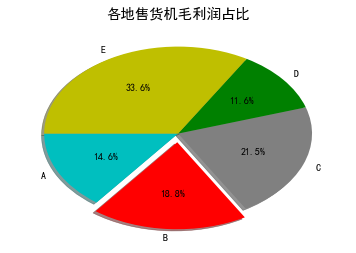

In [76]:
labels = ['A','B','C','D','E']
share = [0.1457872472454974,0.18838145509341567,0.21462585830880168,0.11568775686188996,0.3355176824903953]
explode = [0, 0.1, 0, 0, 0]
plt.pie(share, explode = explode,
        labels = labels, autopct = '%3.1f%%',
        startangle = 180, shadow = True,
        colors = ['c', 'r', 'gray', 'g', 'y'])
plt.title('各地售货机毛利润占比')

In [77]:
df_2=df_合并数据.pivot_table(index=['month','二级类'],aggfunc={'实际金额':'mean'})

In [78]:
df_2.head()

实际金额
month      二级类           
2017-01-01 乳制品   5.389671
           功能饮料  4.989583
           咖啡    5.844828
           坚果炒货  6.250000
           方便速食  5.641975

In [79]:
df_2.to_csv(r'C:\Users\1\Desktop\df_2.csv',encoding='utf_8_sig')

In [80]:
df_3=pd.read_csv('df_2.csv')

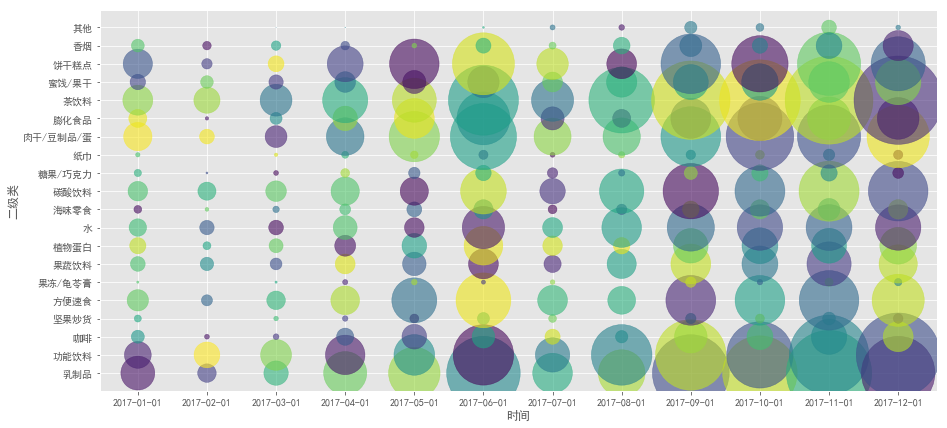

In [81]:
production = df_3.实际金额
tem = df_3.month
rain = df_3.二级类

colors = np.random.rand(len(tem))  # 颜色数组
size = production
plt.figure(1,figsize=(15,7))
plt.scatter(tem, rain, s=size, c=colors, alpha=0.6)  # 画散点图, alpha=0.6 表示不透明度为 0.6
plt.xlabel('时间')  # 横坐标轴标题
plt.ylabel('二级类')  # 纵坐标轴标题
plt.show()

- 任务三

In [82]:
df_合并数据_饮料.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,month,大类,二级类
1823,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017-01-01 09:41:00,B,已出货未退款,已提现,2017-01-01,饮料,碳酸饮料
1824,DD2017081674930718027511408558,E43A6E078A06874,6.0,6.0,600ml可口可乐,2017-01-04 21:38:00,E,已出货未退款,已提现,2017-01-01,饮料,碳酸饮料
1825,DD201708167493531313434854226,E43A6E078A04228,7.0,7.0,600ml可口可乐,2017-01-09 14:48:00,C,已出货未退款,已提现,2017-01-01,饮料,碳酸饮料
1826,DD201708167493882746545066631,E43A6E078A07631,7.0,7.0,600ml可口可乐,2017-01-10 08:01:00,D,已出货未退款,已提现,2017-01-01,饮料,碳酸饮料
1827,DD201708167493891513500780874,E43A6E078A04134,3.5,3.5,600ml可口可乐,2017-01-10 16:13:00,B,已出货未退款,已提现,2017-01-01,饮料,碳酸饮料


In [83]:
df_合并数据_饮料_类别=df_合并数据_饮料.groupby('商品')

In [84]:
df_合并数据_饮料_类别.订单号.count().describe()

count     118.000000
mean      393.576271
std       691.247113
min         2.000000
25%        38.000000
50%       107.000000
75%       430.500000
max      4964.000000
Name: 订单号, dtype: float64

- 对所有售货机每个商品的订单量进行描述统计分析发现:饮料类一共有118种商品，订单量的平均数为394，最小为2，最大为4964，中位数为107，1分位数38，3分位数为430。因此我们可以认为当订单量在[0,38]区间内为滞销，在[38,430]区间内为正常，在[430，4964]区间内为畅销。

In [85]:
data_A_合并数据_饮料=data_A_合并数据.loc[data_A_合并数据.大类=='饮料']
data_B_合并数据_饮料=data_B_合并数据.loc[data_B_合并数据.大类=='饮料']
data_C_合并数据_饮料=data_C_合并数据.loc[data_C_合并数据.大类=='饮料']
data_D_合并数据_饮料=data_D_合并数据.loc[data_D_合并数据.大类=='饮料']
data_E_合并数据_饮料=data_E_合并数据.loc[data_E_合并数据.大类=='饮料']

In [86]:
data_A_合并数据_饮料.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,month,day,大类,二级类
228,DD201708167493683503095993712,E43A6E078A04172,3.0,3.0,250ml维他柠檬茶,2017-01-01 19:55:00,A,已出货未退款,已提现,2017-01-01,2017-01-01,饮料,茶饮料
229,DD201708167493507701935975302,E43A6E078A04172,3.0,3.0,250ml维他柠檬茶,2017-01-01 20:25:00,A,已出货未退款,已提现,2017-01-01,2017-01-01,饮料,茶饮料
230,DD201708167493662547010881037,E43A6E078A04172,3.0,3.0,250ml维他柠檬茶,2017-01-03 09:50:00,A,已出货未退款,已提现,2017-01-01,2017-01-03,饮料,茶饮料
231,DD20170816749300338025192860536,E43A6E078A04172,6.0,6.0,250ml维他柠檬茶,2017-01-04 00:29:00,A,已出货未退款,已提现,2017-01-01,2017-01-04,饮料,茶饮料
232,DD201708167493849176273799289,E43A6E078A04172,3.0,3.0,250ml维他柠檬茶,2017-01-08 21:06:00,A,已出货未退款,已提现,2017-01-01,2017-01-08,饮料,茶饮料


In [87]:
data_A_合并数据_饮料_类别=data_A_合并数据_饮料.groupby('商品')

In [88]:
A订单量=data_A_合并数据_饮料_类别.订单号.count()

In [89]:
A订单量.to_csv(r'C:\Users\1\Desktop\task3-1A.csv',encoding='utf_8_sig')

In [90]:
data_B_合并数据_饮料_类别=data_B_合并数据_饮料.groupby('商品')
B订单量=data_B_合并数据_饮料_类别.订单号.count()
B订单量.to_csv(r'C:\Users\1\Desktop\task3-1B.csv',encoding='utf_8_sig')

In [91]:
data_C_合并数据_饮料_类别=data_C_合并数据_饮料.groupby('商品')
C订单量=data_C_合并数据_饮料_类别.订单号.count()
C订单量.to_csv(r'C:\Users\1\Desktop\task3-1C.csv',encoding='utf_8_sig')

In [92]:
data_D_合并数据_饮料_类别=data_D_合并数据_饮料.groupby('商品')
D订单量=data_D_合并数据_饮料_类别.订单号.count()
D订单量.to_csv(r'C:\Users\1\Desktop\task3-1D.csv',encoding='utf_8_sig')

In [93]:
data_E_合并数据_饮料_类别=data_E_合并数据_饮料.groupby('商品')
E订单量=data_E_合并数据_饮料_类别.订单号.count()
E订单量.to_csv(r'C:\Users\1\Desktop\task3-1E.csv',encoding='utf_8_sig')

In [94]:
A订单量.to_csv(r'C:\Users\1\Desktop\taskA.csv',encoding='utf_8_sig')
B订单量.to_csv(r'C:\Users\1\Desktop\taskB.csv',encoding='utf_8_sig')
C订单量.to_csv(r'C:\Users\1\Desktop\taskC.csv',encoding='utf_8_sig')
D订单量.to_csv(r'C:\Users\1\Desktop\taskD.csv',encoding='utf_8_sig')
E订单量.to_csv(r'C:\Users\1\Desktop\taskE.csv',encoding='utf_8_sig')

- 任务4

In [98]:
data_A_合并数据_大类=data_A_合并数据.groupby(['大类','month'])

In [106]:
A4_2=data_A_合并数据_大类.实际金额.sum()

In [107]:
A4_2.to_csv(r'C:\Users\1\Desktop\A4_2.csv',encoding='utf_8_sig')

In [108]:
data_B_合并数据_大类=data_B_合并数据.groupby(['大类','month'])
B4_2=data_B_合并数据_大类.实际金额.sum()
B4_2.to_csv(r'C:\Users\1\Desktop\B4_2.csv',encoding='utf_8_sig')

In [109]:
data_C_合并数据_大类=data_C_合并数据.groupby(['大类','month'])
C4_2=data_C_合并数据_大类.实际金额.sum()
C4_2.to_csv(r'C:\Users\1\Desktop\C4_2.csv',encoding='utf_8_sig')

In [110]:
data_D_合并数据_大类=data_D_合并数据.groupby(['大类','month'])
D4_2=data_D_合并数据_大类.实际金额.sum()
D4_2.to_csv(r'C:\Users\1\Desktop\D4_2.csv',encoding='utf_8_sig')

In [111]:
data_E_合并数据_大类=data_E_合并数据.groupby(['大类','month'])
E4_2=data_E_合并数据_大类.实际金额.sum()
E4_2.to_csv(r'C:\Users\1\Desktop\E4_2.csv',encoding='utf_8_sig')